# Homework #2

**See Canvas for HW #2 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the scanning policy in the syllabus. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## A. Theoretical Problems

## A.1 Some probability calculations

**A.1(a) [10 points] The CU Boulder triathlon team has $12$ women and $9$ men. The team is going to a race and can only enter $5$ participants. What is the probability of randomly selecting a race squad of $5$ participants with exactly $3$ women?**

\begin{aligned}
\text{Sample Space} &= \text{Choosing 5 participants from 21 members} \\
C(21,5) &= \frac{21!}{(21-5)!5!} = \frac{21!}{16!5!} = 20349 \\
\text{condition} &= \text{Choosing 3 women from 12 women and 2 men from 9 men} \\
_{12}C_{3} \times _{9}C_{2} &= \frac{12 \times 11 \times 10}{1 \times 2 \times 3} \times \frac{9 \times 8}{1 \times 2} = 220 \times 36 \\
\text{Probability (condition)} &= \frac{220 \times 36}{20349} = 0.389
\end{aligned}

**A.1(b) [10 points] What is the probability that that at least two people in a room of 45 have the same birthday? Assume that all possible birthdays are equally likely, and ignore leap year. (HINT: You might consider using the theorem $P(A^C) = 1−P(A)$. If you use factorials and get overflow errors, or that the probability is $0$, I suggest writing a loop in `R` to calculate the probability.)**

\begin{aligned}
\text{By Complement Rule,} \\
\text{Let A = all 45 have different birthdays} \\
P(A) &= \frac{365 \times 364 \times 363 \times \cdots \times 321}{365^{45}} \\
&= 0.06 \\
P(A^C) &= 1 - P(A) \\
&= 1 - 0.06 \\
&= 0.94
\end{aligned}

In [6]:
j = 1
for(i in 1:45){
    j = j * (365 - i + 1)
}
s = 365^45
proba = j/s
proba_c = 1 - proba
proba_c

[1] 0.9409759

**A.1(c) [10 points] Three dice are thrown. What is the probability that a sum of $12$ appears on the faces?**

\begin{aligned}
(6,5,1) &\rightarrow 3! = 6 \\
(6,4,2) &\rightarrow 3! = 6 \\
(6,3,3) &\rightarrow \frac{3!}{2!} = 3 \\
(5,5,2) &\rightarrow \frac{3!}{2!} = 3 \\
(5,4,3) &\rightarrow 3! = 6 \\
(4,4,4) &\rightarrow \frac{31}{3!} = 1 \\
\text{Total} &= 25 \\
\text{Sample space} &= 6 \times 6 \times 6 = 216 \\
P(\text{sum of 12}) &= \frac{25}{216} = 0.116
\end{aligned}

## A.2 Probability and Causality

What does it mean for one event C to cause another event E—for example, smoking (C) to cause cancer (E)? There is a long history in philosophy, statistics, and the sciences of trying to clearly analyze the concept of a cause. One tradition says that causes raise the probability of their effects; we may write this symbolically as

$$P(E | C)>P(E) \quad \quad (1)$$


**A.2(a) [10 points] Does equation (1) imply that $P(C | E) > P(C)$? If so, prove it. If not, give a counter example.**




$$\textbf{To verify: } P(E|C) > P(E) \implies P(C|E) > P(C)$$

$$\text{By Bayes Theorem,}$$
\begin{align*}
P(E|C) &= \frac{P(C|E)P(E)}{P(C)} \\
\end{align*}

$$\text{ We can substitute in P(E|C) as,}$$
\begin{align*}
\frac{P(C|E)P(E)}{P(C)} &> P(E) \\
\text{(÷ by P(E))} \\
\implies P(C|E) &> P(C)
\end{align*}

$$\text{Therefore, } P(E|C) > P(E) \text{ implies } P(C|E) > P(C)$$


**A.2(b) [10 points] [*Optional for students in STAT 4000*] Another way to formulate a probabilistic theory of causation is to say that**

$$P (E | C) > P(E | C^C). \qquad \qquad (2)$$ 

**Show that equation (1) from A.2(a) implies equation (2).**

$$\textbf{To show: } P(E|C) > P(E) \implies P(E|C) > P(E|C^c)$$
$$P(E) = P(E|C)P(C) + P(E|C^c)P(C^c)$$
$$\text{In eqn (1),}$$
\begin{align*}
\implies P(E|C) &> P(E|C)P(C) + P(E|C^c)P(C^c) \\
\implies P(E|C) - P(E|C)P(C) &> P(E|C^c)P(C^c) \\
\implies P(E|C)[1 - P(C)] &> P(E|C^c)P(C^c) \\
\implies P(E|C)P(C^c) &> P(E|C^c)P(C^c) \\
\implies P(E|C) &> P(E|C^c)
\end{align*}

$$\text{The condition is proved.}$$

## A.3 Conditional probabilities

Suppose a particular crime is committed in Jerry’s apartment. We’d like to know whether Newman is guilty of the crime. We are torn as to whether we think he is guilty: we think it’s equally likely that he guilty or not guilty. Suppose that, in similar situations, we know that if a suspect is guilty, 85% of the time their finger prints are found at the scene, and, we know that if a suspect is not guilty, 30% of the time their finger prints are found at the scene.

**A.3(a) [5 points] What is the probability that Newman’s finger prints are found at the scene?**

$$P(\text{Guilty}) = P(\text{Not Guilty}) = \frac{1}{2} = 0.5$$

$$P(\text{Fingerprints}|\text{Guilty}) = 0.85$$

$$P(\text{Fingerprints}|\text{Not Guilty}) = 0.30$$

$$\text{By Law of Total Probability,}$$
\begin{align*}
P(\text{Fingerprints}) &= P(\text{Fingerprints}|\text{Guilty}) \times P(\text{Guilty}) \\
&+ P(\text{Fingerprints}|\text{Not Guilty}) \times P(\text{Not Guilty}) \\
&= 0.85 \times 0.5 + 0.30 \times 0.5 \\
&= 0.425 + 0.15 \\
&= 0.575
\end{align*}

**A.3(b) [5 points] If Newman’s finger prints are found at the scene, how likely is it that he is guilty?**

$$\text{P(Guilty|Fingerprints)} = \frac{P(\text{Fingerprints}|\text{Guilty}) \times P(\text{Guilty})}{P(\text{Fingerprints})}$$

$$= \frac{0.85 \times 0.5}{0.575}$$

$$= \frac{0.425}{0.575}$$

$$\text{P(Guilty|Fingerprints)} = 0.739$$

**A.3(c) [7 points] If Newman’s finger prints are not found at the scene, how likely is it that he is guilty?**

$$\text{P(Guilty|No Fingerprints)} = \frac{P(\text{No Fingerprints}|\text{Guilty}) \times P(\text{Guilty})}{P(\text{No Fingerprints})}$$
$$\textbf{Here, } P(\text{No fingerprints}|\text{Guilty}) = 1 - P(\text{Fingerprints}|\text{Guilty})$$
$$= 1 - 0.85$$
$$= 0.15$$

$$P(\text{No fingerprints}) = 1 - P(\text{Fingerprints})$$
$$= 1 - 0.575$$
$$= 0.425$$

$$P(\text{Guilty}|\text{No fingerprints}) = \frac{0.15 \times 0.5}{0.425}$$

$$P(\text{Guilty}|\text{No fingerprints}) = 0.176$$

## B. Computational Problems

## B.1 Probability Simulations

There is an urn that has $100$ marbles in it: $2$ are red, $70$ are yellow, $13$ are green and $15$ are blue. Simulate data to imitate someone drawing a marble from the urn (replacing after each draw), with the color recorded at each draw (HINT: the `sample()` function in `R` will be useful here).

**B.1(a) [8 points] Plot the fraction of times a yellow marble is drawn in the first $1000$ draws. On the $x$-axis, include the number of draws, and on the $y$-axis, include the cumulative fraction of yellow draws. Why does this number fluctuate more when the number of draws is smaller?**

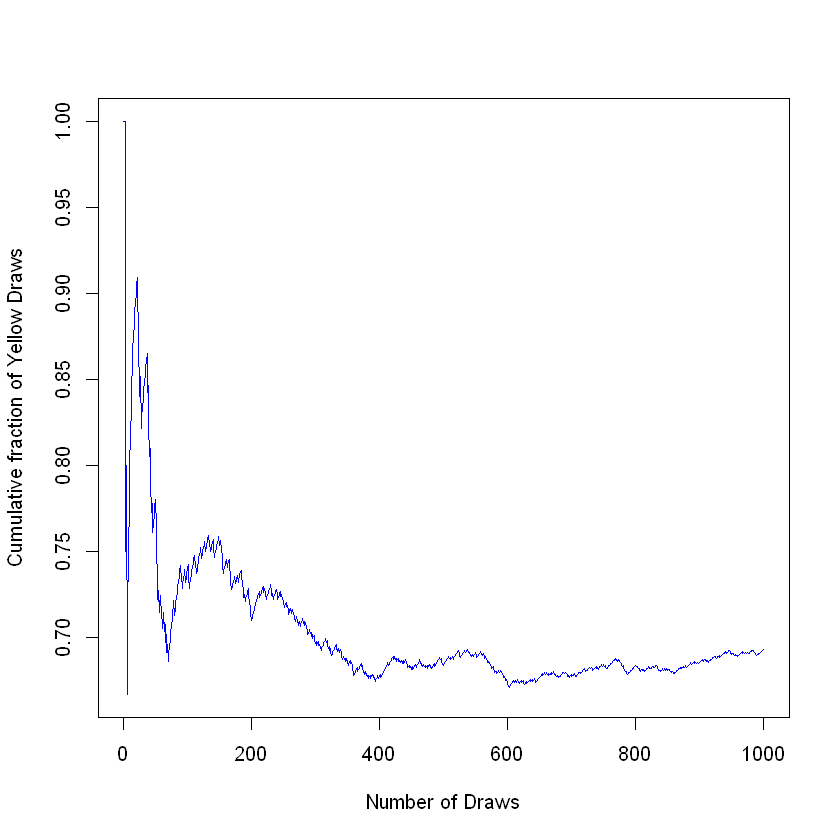

In [1]:
marbles = c("red","yellow","green","blue")
probs = c(0.02,0.70,0.13,0.15)

set.seed(99)
g = sample(marbles,size=1000, replace = TRUE, prob = probs)

cumulative_yellow = 0
plot_proportions = c()

for (i in 1:length(g)){
    marble = g[i] == "yellow"
    cumulative_yellow = cumulative_yellow + marble
    proportion_yellow = cumulative_yellow/i
    plot_proportions = c(plot_proportions,proportion_yellow)
    }
x = seq(1,length(g))
plot(x,plot_proportions,type = "l",col="blue",xlab="Number of Draws", ylab="Cumulative fraction of Yellow Draws")

**B.1(b) [5 points] About how many draws are needed before the proportion of yellow marbles drawn in the simulated data is within $0.1$ of the true probability of drawing a yellow marble? You can answer using a visual assessment of your plot from the previous part.**

As per the above generated visual plot, if the sample size increases, the sample proportion value will stabilize and tend to fit into the true probability and the fluctuations decrease.
150 - 200 draws are needed for stabilizing the cumulative fraction of yellow at 0.1 of the true probability so that it will stay in the 0.6 - 0.8 range.

**B.1(c) [8 points] Repeat the two steps above for the red marble. What do you notice that is different, and why do you think it is different?**



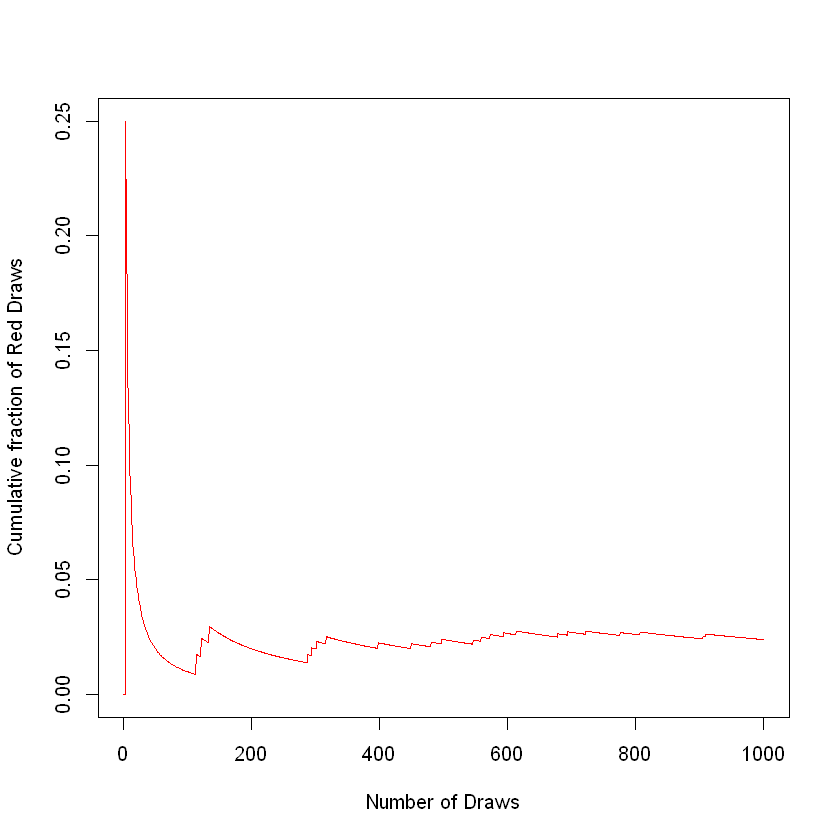

In [2]:
marbles = c("red","yellow","green","blue")
probs = c(0.02,0.70,0.13,0.15)

set.seed(99)
g = sample(marbles,size=1000, replace = TRUE, prob = probs)

cumulative_red = 0
plot_proportions = c()

for (i in 1:length(g)){
    marble = g[i] == "red"
    cumulative_red = cumulative_red + marble
    proportion_red = cumulative_red/i
    plot_proportions = c(plot_proportions,proportion_red)
    }
x = seq(1,length(g))
plot(x,plot_proportions,type = "l",col="red",xlab="Number of Draws", ylab="Cumulative fraction of Red Draws")


150 - 200 draws are needed for stabilizing the cumulative fraction of red at 0.1 of the true probability so that it will stay in the 0-0.12 range.

## B.2 Probability confirmations?

**B.2(a) [6 points] Run a simulation that estimates the probability calculation in theoretical question A.1(b). That is, simulate the birthdays (you can use the numbers 1 through 365)  of 45 people many many times (e.g., `m = 100,000`), and find the relative frequency of cases in which at least two people share a birthday (HINT: The `anyDuplicated()`, `sample()}` and `replicate()}` functions may be useful here).**

In [5]:
people = 45
simulation_size = 100000
set.seed(99)
simulation = replicate(simulation_size, {
         birthdays = sample(1:365, people, replace = TRUE)
         anyDuplicated(birthdays) > 0
         })
probability = mean(simulation)
probability

[1] 0.94195

**B.2(b) [6 points] Run a simulation that estimates the probability calculation in theoretical question A.1(c).**

In [13]:
simulation_size <- 100000
set.seed(99)
sums <- replicate(simulation_size, {
  rolling_three_dice <- sample(1:6, 3, replace = TRUE)
  sum(rolling_three_dice)
})
probability <- mean(sums == 12)
print(probability)

[1] 0.11574
